# Solving a chemical equilibrium problem in Python

In [1]:
# Import python packages
import pandas as pd # allows us to use dataframes
import numpy as np
import matplotlib.pyplot as plt # allows us to make graphs

In order to elucidate how we can use python to solve an equilibrium problem, we can start from a simple dimerisation reaction

\begin{equation}
2A \leftrightharpoons B
\end{equation}

whose equilibrium constant can be written as
\begin{equation}
K_{eq} = \frac{[B]}{[A]^2} = 50
\end{equation}

First of all we define some constants that will be used throughout the code, $RT$, the equilibrium constant $K_{eq}$ and the initial conditions

In [2]:
# Experiment temperature
RT = 8.314 * 298.15

# Equilibrium consant
Keq = 50

# Initial concentrations 
concA = 0.2
concB = 0.01

We then define two variables for the stoichiometric coefficients of $A$ and $B$. Note that we use negative values for the reactant, because it will be consumed, and a positive value for the product, because it will be formed.

In [3]:
# Stoichiometric coefficient of the species
nuA = -2
nuB = 1

We the define the the parameter $\mathrm{d}c$ that will be used to progressively update the concentrations of the species. This parameter can be varied to control the convergence of the calculations.

In [4]:
# Adjustable parameter dc
dc = 1e-7

Before working on the algorithm to solve the equilibrium problem we define a dataFrame, _df_, to store the concentrations of the species. We can also define two variables with to produce some neat formatted screen output. 

In [5]:
# Create an empty dataframe for plotting
df = pd.DataFrame(columns=['Cycle','[A]','[B]','Q'])

headerFormat = "%20s %6s %12s %12s %12s %12s"
outputFormat = "%20s %6i %12.5f %12.5f %12.5f %12.5f"

The first thing to do we compute the reaction quotient using the initial conditions
\begin{equation}
Q = \frac{\mathrm{[B]}_0}{\mathrm{[A]}^2_0}
\end{equation}



In [6]:
# Reaction quotient
Q = concB / (concA*concA)

# Append data to the dataframe
df = df.append({'Cycle' : 0,
                '[A]' : concA,
                '[B]' : concB,
                'Q' : Q },
               ignore_index = True)

# Print the data header
print(headerFormat % ("","","[A]","[B]", "Q", "Keq"))

# Print the first set of data
print(outputFormat % ("Initial conditions",0,concA,concB,Q,Keq))

                                     [A]          [B]            Q          Keq
  Initial conditions      0      0.20000      0.01000      0.25000     50.00000


We then compute the _driving_ force 
\begin{equation}
F = RT \ln\bigg[\frac{K_{eq}}{Q}\bigg]
\end{equation}

In [7]:
# Compute the driving force
force = RT * np.log(Keq / Q)

We can then update the concentrations using the driving force, the stoichiometric coefficients of the species, $\nu_i$, and the infinitesimal change in concentration parameter defined above, $\mathrm{d}c$.

In [8]:
# Update the concentrations
dn = force * dc
concA = concA + dn * nuA 
concB = concB + dn * nuB

We then re-compute the reaction quotient using the updated concentrations. Note how the reaction quotient moved closer to the equilibrium constant, which indicates that the reaction is going in the right direction.

In [9]:
# NEW reaction quotient ...
Q = concB / (concA*concA)

# Print the new set of data
print(outputFormat % ("First Cycle",1,concA,concB,Q,Keq))

         First Cycle      1      0.19737      0.01131      0.29041     50.00000


We can now make a loop to automate this procedure, _e.g._ repeat the steps above 500 times.
Note how after $\approx 400$ cycles the reaction quotient is equal to the equilibrium constant and the reaction doesn't proceed any further.

In [10]:
# Let's go up to 500 cycles
nCycles = 500
for icycle in range(2,nCycles+1):
    force = RT * np.log(Keq / Q)
    dn = force * dc
    concA = concA + dn * nuA
    concB = concB + dn * nuB
    Q = concB / (concA*concA)

    # Write the concentrations on the screen every 100 cycles
    if icycle%50 == 0:
        print(outputFormat % ("Cycle",icycle,concA,concB,Q,Keq))
        
    # Append data to dataframe for plotting every 10 cycles
    if icycle%10 == 0:
        df = df.append({'Cycle' : icycle,
                        '[A]' : concA,
                        '[B]' : concB,
                        'Q' : Q },
                        ignore_index = True)

               Cycle     50      0.11166      0.05417      4.34492     50.00000
               Cycle    100      0.06839      0.07580     16.20596     50.00000
               Cycle    150      0.05039      0.08480     33.39680     50.00000
               Cycle    200      0.04447      0.08776     44.37058     50.00000
               Cycle    250      0.04279      0.08861     48.39563     50.00000
               Cycle    300      0.04233      0.08883     49.56766     50.00000
               Cycle    350      0.04221      0.08889     49.88530     50.00000
               Cycle    400      0.04218      0.08891     49.96970     50.00000
               Cycle    450      0.04217      0.08891     49.99200     50.00000
               Cycle    500      0.04217      0.08891     49.99789     50.00000


Finally we can make a plot of the concentrations to show the convergence of the calculations.
Alternatively, we could plot the evolution of the reaction quotient or of the force.

In [11]:
# Define the figure's parameters
# Largest font
fontsize=28

figureParameters = {'figure.figsize' : (12,8),
                    'legend.fontsize': fontsize*0.7,
                    'axes.labelsize' : fontsize,
                    'axes.titlesize' : fontsize,
                    'xtick.labelsize': fontsize*0.8,
                    'ytick.labelsize': fontsize*0.8,
                    'xtick.direction': "out", # tick marks inside the frame
                    'ytick.direction': "out", # tick marks inside the frame
                    'axes.linewidth' : 3,
                    'axes.titlepad'  : 25}

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator)

# Make these parameters the default for every figure
plt.rcParams.update(figureParameters)

def prettyTicks(ax,xspacing,yspacing):
    # Add tick marks on all sides of the figure
    # ax.xaxis.set_ticks_position('both')
    # ax.yaxis.set_ticks_position('both')

    # Define the spacing of the major tick marks
    # It is useful to call this function with 0 for both ticks' spacing to see 
    # what the best range looks like number of tick marks
    if (xspacing > 0):
        ax.xaxis.set_major_locator(MultipleLocator(xspacing))
    if (yspacing > 0):
        ax.yaxis.set_major_locator(MultipleLocator(yspacing))
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(which='minor', length=6, width=3, color='black')
    ax.tick_params(which='major', length=12, width=3, color='black')

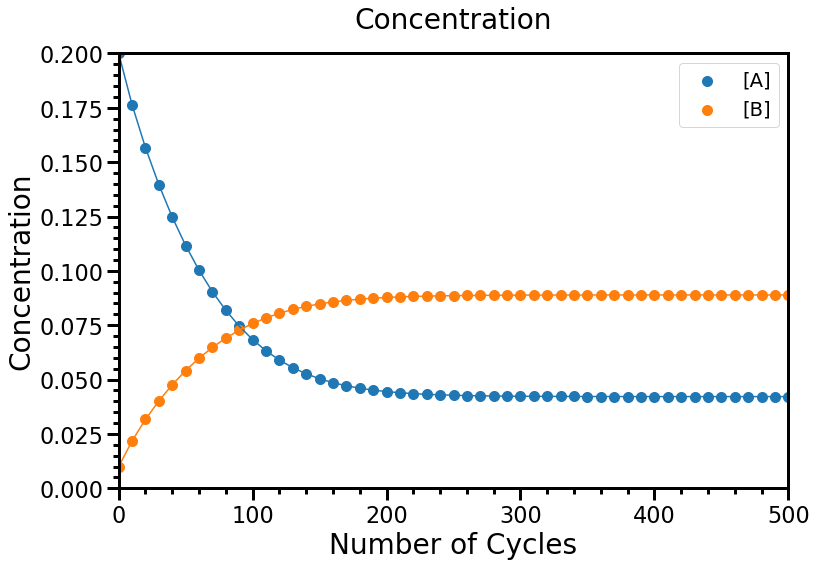

In [12]:
# Make a figure to show the convergence of the concentrations
fig = plt.figure()
ax = fig.gca()
prettyTicks(ax,100,0)

x = df["Cycle"]
y1 = df["[A]"]
y2 = df["[B]"]

ax.set(xlabel="Number of Cycles")
ax.set(ylabel="Concentration")

ax.scatter(x,y1,label="[A]",s=100)
ax.scatter(x,y2,label="[B]",s=100)

ax.plot(x,y1,label="")
ax.plot(x,y2,label="")

ax.set(xlim=(0,500))
ax.set(ylim=(0,0.2))

plt.title("Concentration")
plt.legend()
plt.show()

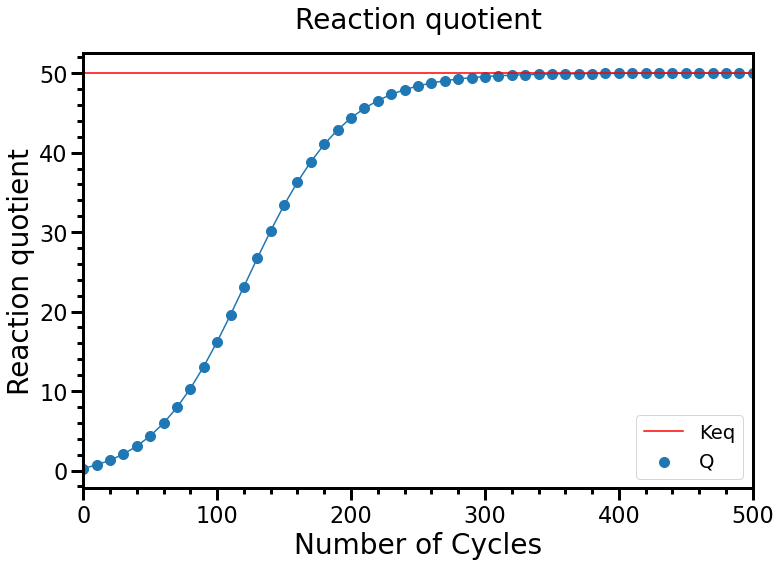

In [13]:
# Make a figure to show the convergence of the concentrations
fig = plt.figure()
ax = fig.gca()
prettyTicks(ax,100,0)

x = df["Cycle"]
y1 = df["Q"]

ax.set(xlabel="Number of Cycles")
ax.set(ylabel="Reaction quotient")
ax.scatter(x,y1,label="Q",s=100)
ax.plot(x,y1,label="")
ax.axhline(y=Keq,label="Keq",color='red')
ax.set(xlim=(0,500))

plt.title("Reaction quotient")
plt.legend()
plt.show()

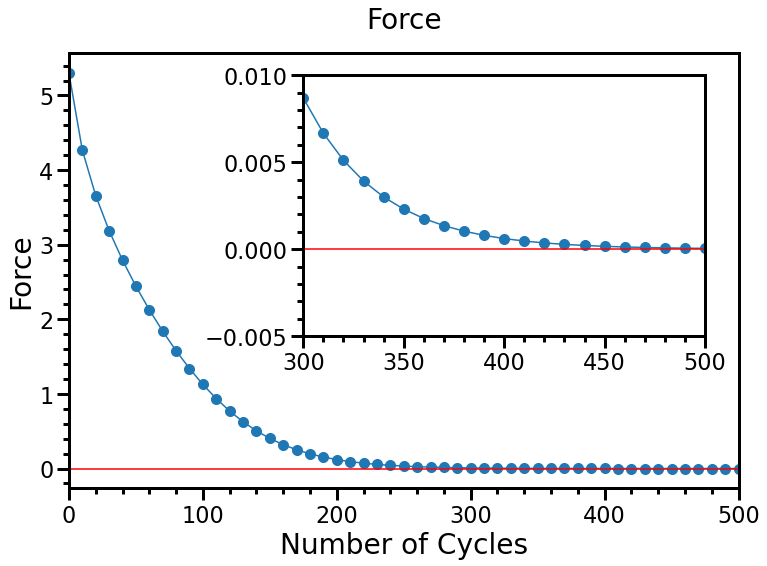

In [14]:
# Make a figure to show the convergence of the concentrations
fig = plt.figure()
ax = fig.gca()
prettyTicks(ax,100,0)

x = df["Cycle"]
y1 = np.log (Keq / df["Q"])

ax.set(xlabel="Number of Cycles")
ax.set(ylabel="Force")
ax.scatter(x,y1,s=100)
ax.plot(x,y1)
ax.axhline(y=0,color='red')
ax.set(xlim=(0,500))

axins = ax.inset_axes([0.35, 0.35, 0.6, 0.6])
prettyTicks(axins,0,0)

axins.scatter(x,y1,label="Force",s=100)
axins.plot(x,y1,label="")
axins.axhline(y=0,color='red')
axins.set(xlim=(300,500))

yl=1e-2
axins.set(ylim=(-yl/2,yl))


plt.title("Force")
plt.show()